In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import glob

In [2]:
from scripts.my_camera_cal import readValuesToUndistort
from scripts.my_camera_cal import unwarp

In [3]:
mtx,dist=readValuesToUndistort("config/myvalues_to_undistort.p")

In [4]:
# Make a list of calibration images
images = glob.glob('../test_images/*.jpg')
print(images)

['../test_images\\straight_lines1.jpg', '../test_images\\straight_lines2.jpg', '../test_images\\test1.jpg', '../test_images\\test2.jpg', '../test_images\\test3.jpg', '../test_images\\test4.jpg', '../test_images\\test5.jpg', '../test_images\\test6.jpg']


In [5]:
# Read in an image
image = mpimg.imread('../test_images/straight_lines1.jpg')
print(image.shape)

(720, 1280, 3)


In [6]:
#undistort it
dst = cv2.undistort(image, mtx, dist, None, mtx)
print(dst.shape)

(720, 1280, 3)


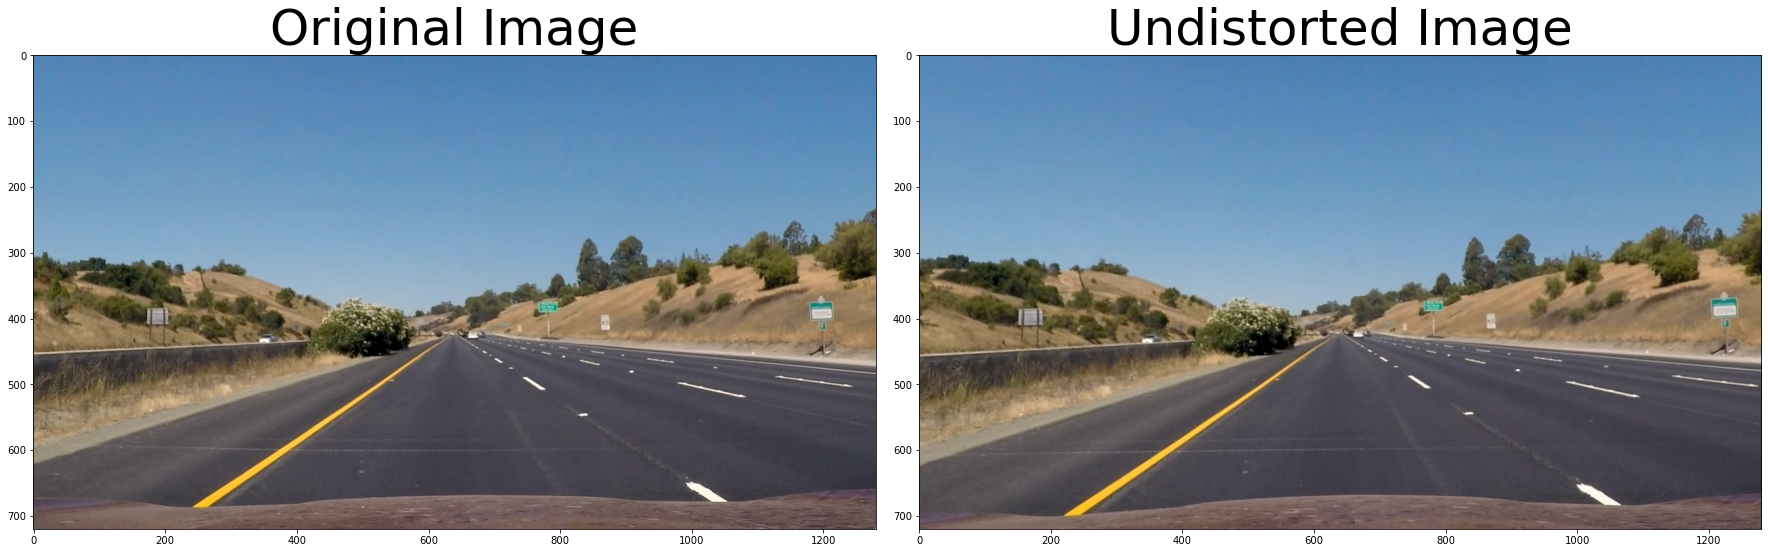

In [7]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Color Thresholding

Here we apply color transformation to the undistorted image

### First RGB

In [8]:
R = dst[:,:,0]
G = dst[:,:,1]
B = dst[:,:,2]

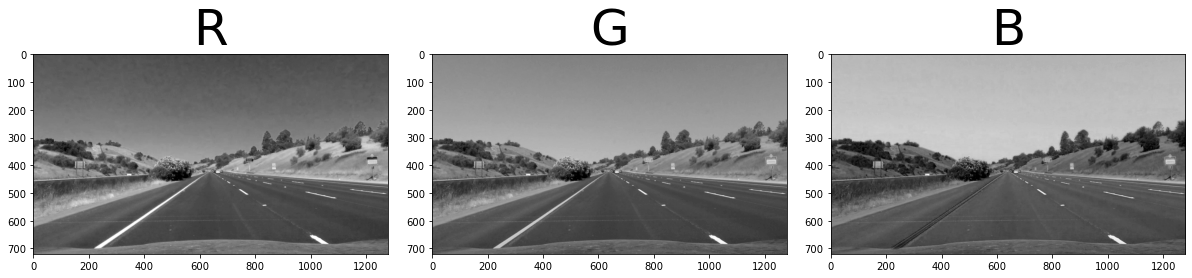

In [10]:
# Plot the result
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(16, 6))
f.tight_layout()
ax1.imshow(R,cmap="gray")
ax1.set_title('R', fontsize=50)
ax2.imshow(G,cmap="gray")
ax2.set_title('G', fontsize=50)
ax3.imshow(B,cmap="gray")
ax3.set_title('B', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

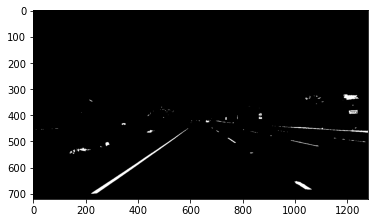

In [11]:
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1
plt.imshow(binary,cmap="gray")

### Now we convert to HLS

In [12]:
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]

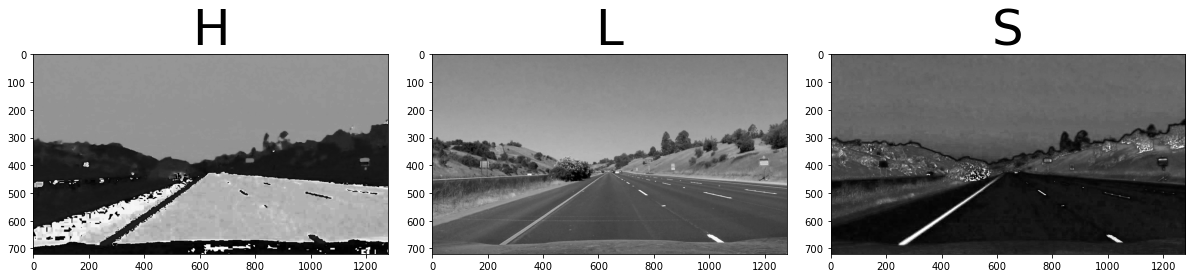

In [13]:
# Plot the result
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(16, 6))
f.tight_layout()
ax1.imshow(h_channel,cmap="gray")
ax1.set_title('H', fontsize=50)
ax2.imshow(l_channel,cmap="gray")
ax2.set_title('L', fontsize=50)
ax3.imshow(s_channel,cmap="gray")
ax3.set_title('S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

Thresholding the **S** image

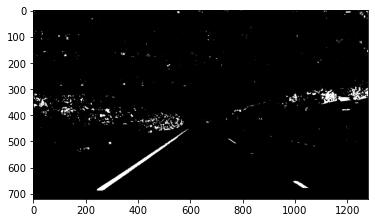

In [19]:
thresh = (110, 255)
binary = np.zeros_like(s_channel)
binary[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
plt.imshow(binary,cmap="gray")

low thresholding the **H** image

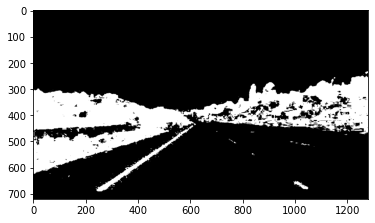

In [20]:
thresh = (15, 100)
binary = np.zeros_like(h_channel)
binary[(h_channel > thresh[0]) & (h_channel <= thresh[1])] = 1
plt.imshow(binary,cmap="gray")